In [159]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


In [160]:
!pip install word2vec

In [161]:
!pip install node2vec

In [162]:
try:
    # Check if Karate Club is installed:
    import karateclub
except ImportError:
    # If Karate Club is not installed, install it.
    %pip install karateclub==1.2.1

In [163]:
G = nx.karate_club_graph()

In [164]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [165]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

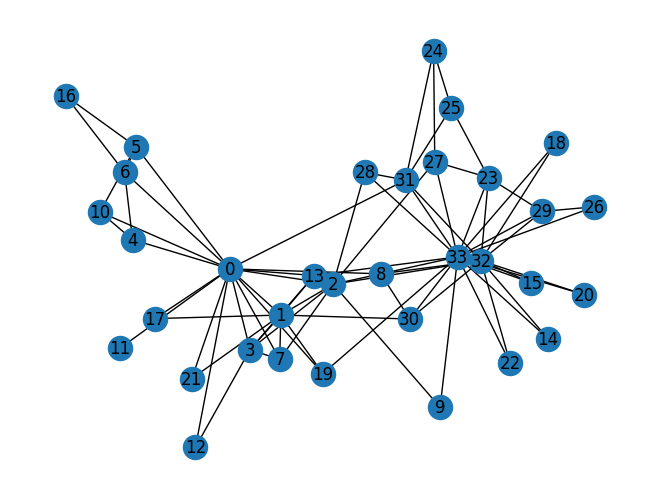

In [166]:
nx.draw(G, with_labels=True)

## Task: Implementing a Random Walk

In this task, you are required to complete a function that performs a random walk on a graph `G` starting from a given node.

### Instructions:
1. The function `get_random_walk` takes in two parameters:
   - `node`: the starting point of the random walk.
   - `walk_length`: the maximum number of steps to take in the walk.

2. The function should return a list of nodes visited during the random walk. The random walk should stop if there are no unvisited neighbors for the current node.

3. You need to:
   - Create a list to store the nodes visited in the walk (start by adding the starting node).
   - For each step of the walk, select a random unvisited neighbor from the current node’s neighbors.
   - Continue the walk until the walk length is reached or there are no unvisited neighbors.

In [167]:
# Function to compute random walks
def get_random_walk(node, walk_length):
    random_walk_length = [node]
    
    for i in range(walk_length - 1):
        neighbors = list(G.neighbors(node))
        neighbors = list(set(neighbors) - set(random_walk_length))  # Avoid revisiting nodes
        if len(neighbors) == 0:
            break  # Stop if no unvisited neighbors
        random_neighbor = random.choice(neighbors)
        random_walk_length.append(random_neighbor)
        node = random_neighbor

    return random_walk_length

In [246]:
def get_random_walk(node, walk_length):
    random_walk_length = [node]

    for i in range(walk_length-1):
        neighbors = list(G.neighbors(node))
        neighbors = list(set(neighbors) - set(random_walk_length))
        if len(neighbors) == 0:
            break
        random_neighbor = random.choice(neighbors)
        random_walk_length.append(random_neighbor)
        node = random_neighbor

    return random_walk_length

In [169]:
get_random_walk(2, 10)

[2, 7, 3, 13, 0, 17, 1, 30, 33, 19]

In [170]:
all_nodes = list(G.nodes())
number_of_random_walks = 5
random_walks = []

for node in tqdm(all_nodes):
    for i in range(number_of_random_walks):
        random_walks.append(get_random_walk(node, 10))

100%|██████████| 34/34 [00:00<00:00, 11467.22it/s]


In [171]:
len(random_walks)

170

In [172]:
random_walks[0], random_walks[1]

([0, 13, 33, 31, 32, 15], [0, 8, 32, 20, 33, 27, 23, 25, 24, 31])

In [173]:
model = Word2Vec(window = 4,        # Maximum distance between the current and predicted word within a sentence.
                 sg = 1,            # Training algorithm: 1 for skip-gram; 0 for CBOW.
                 hs = 0,            # If 1, hierarchical softmax will be used for model training.
                 negative = 10,     # How many "noise words" should be drawn (usually between 5-20)
                 alpha=0.03,        # The initial learning rate.
                 min_alpha=0.0007,  # Learning rate will linearly drop to min_alpha as training progresses.
    )

model.build_vocab(random_walks, progress_per=2)

In [174]:
model.train(random_walks,
            total_examples = model.corpus_count,
            epochs = 20,
            report_delay = 1)

(5936, 28460)

In [175]:
print(model)

Word2Vec<vocab=34, vector_size=100, alpha=0.03>


In [176]:
model.wv.vectors.shape

(34, 100)

In [177]:
model.wv.vectors[:, 8]

array([-0.24794236, -0.24386533, -0.25553352, -0.236619  , -0.24636663,
       -0.25344828, -0.25004607, -0.24928667, -0.25250208, -0.2474464 ,
       -0.24546175, -0.24331623, -0.22778526, -0.25257427, -0.2371597 ,
       -0.2467852 , -0.24116567, -0.2539356 , -0.24478166, -0.24424726,
       -0.24227974, -0.24023598, -0.2422873 , -0.23975205, -0.24567546,
       -0.24381097, -0.251102  , -0.23725547, -0.23448113, -0.25258014,
       -0.23590934, -0.24197024, -0.2384164 , -0.24453445], dtype=float32)

In [178]:
# most similar nodes to node '1'
for node, _ in model.wv.most_similar(1):
    print(node, _, True if node in G.neighbors(1) else False)

32 0.9985834360122681 False
15 0.9984884858131409 False
29 0.998460590839386 False
3 0.9984289407730103 True
28 0.9984140396118164 False
11 0.9982932806015015 False
27 0.9982905387878418 False
20 0.9982891082763672 False
18 0.9982685446739197 False
26 0.998241126537323 False


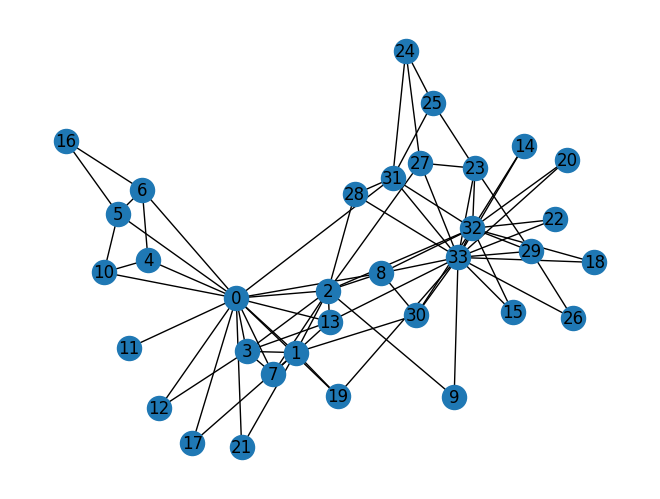

In [179]:
nx.draw(G, with_labels=True)

In [180]:
for v in G.neighbors(1):
    print(v)

0
2
3
7
13
17
19
21
30


In [181]:
labels = KMeans(n_clusters=3, random_state=0).fit_predict(model.wv.vectors)
color_map = plt.get_cmap("tab10")
node_colors = [color_map(label) for label in labels]

In [182]:
def plot_nodes(word_list):

    X = model.wv[word_list]

    # reduce dimensions
    pca_1d = PCA(n_components=1)
    pca_2d = PCA(n_components=2)
    pca_3d = PCA(n_components=3)
    result_1d = pca_2d.fit_transform(X)
    result_2d = pca_2d.fit_transform(X)
    result_3d = pca_3d.fit_transform(X)

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    ax[0].set_axis_off()
    ax[0] = fig.add_subplot(1, 3, 1)
    labels = KMeans(n_clusters=3, random_state=0).fit_predict(result_1d)
    color_map = plt.get_cmap("tab10")
    node_colors = [color_map(label) for label in labels]
    ax[0].scatter([0 for element in range(len(result_1d))], result_1d[:,0], color=node_colors)
    ax[0].set_xlim()

    ax[1].set_axis_off()
    ax[1] = fig.add_subplot(1, 3, 2)
    labels = KMeans(n_clusters=3, random_state=0).fit_predict(result_2d)
    color_map = plt.get_cmap("tab10")
    node_colors = [color_map(label) for label in labels]
    ax[1].scatter(result_2d[:, 0], result_2d[:, 1], color=node_colors)

    ax[2].set_axis_off()
    ax[2] = fig.add_subplot(1, 3, 3, projection='3d')
    labels = KMeans(n_clusters=3, random_state=0).fit_predict(result_3d)
    color_map = plt.get_cmap("tab10")
    node_colors = [color_map(label) for label in labels]
    ax[2].scatter(result_3d[:, 0], result_3d[:, 1], result_3d[:, 2], color=node_colors)
    ax[2].view_init(elev=10., azim=30)
    # for i, word in enumerate(word_list):
    #     ax[2].text(result_3d[i, 0], result_3d[i, 1], result_3d[i, 2], word)


    plt.show()

In [183]:
numbers = list(G.nodes)

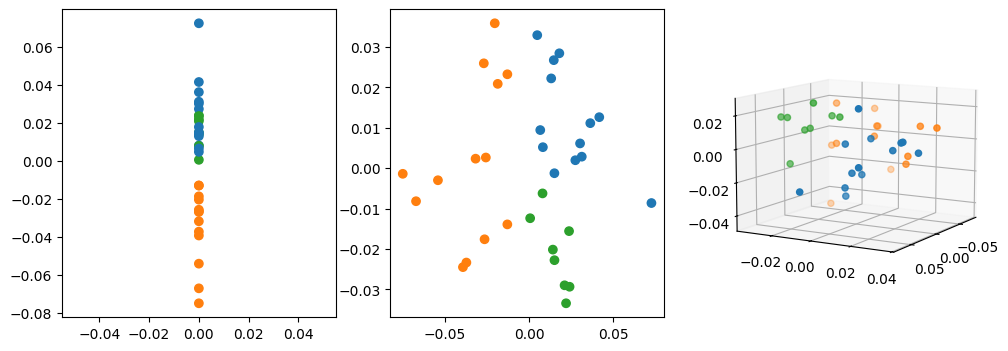

In [184]:
plot_nodes(numbers)

In [185]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec

In [186]:
node2vec = Node2Vec(G, dimensions=128, walk_length=40, num_walks=100, workers=2)

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 592.04it/s]


In [187]:
model = node2vec.fit(window=10, min_count=1)

In [188]:
# Get the vector of node '1'
model.wv.get_vector(1)

array([-0.17044924,  0.2398045 ,  0.01941821,  0.07321738, -0.01126533,
       -0.21154675,  0.04853936,  0.02325773, -0.02407232,  0.32853734,
        0.27662802,  0.12838532,  0.16985068, -0.28959316,  0.07819182,
       -0.0556835 ,  0.26545772,  0.24038537,  0.1113207 ,  0.05118364,
       -0.1871113 ,  0.16451904, -0.01114612, -0.04281802, -0.05442506,
       -0.01088082, -0.04917992,  0.06331026,  0.10675916, -0.01997044,
       -0.18088123,  0.22229537, -0.27572754,  0.04824474, -0.16119161,
        0.07829017,  0.11742666,  0.05768966,  0.14707834, -0.09324903,
        0.03289384,  0.02420305,  0.07024615, -0.10171109,  0.01029846,
        0.0690476 , -0.16915825, -0.07525524, -0.06723502,  0.15174642,
        0.17571272, -0.12681499,  0.12100534,  0.05468902,  0.04272078,
       -0.08307398, -0.1809306 , -0.05214258, -0.02197691,  0.04527092,
        0.05982182,  0.0697061 , -0.03518767, -0.05964743,  0.07842583,
       -0.16125639, -0.07287771,  0.04856146,  0.01958307, -0.08

In [189]:
# most similar nodes to node '1'
for node, _ in model.wv.most_similar(1):
    print((node, _))

('17', 0.7936935424804688)
('4', 0.7630659937858582)
('10', 0.752673327922821)
('19', 0.7323963642120361)
('21', 0.7211057543754578)
('6', 0.7175635695457458)
('5', 0.7129890322685242)
('1', 0.7036303281784058)
('13', 0.7004150748252869)
('11', 0.6940363049507141)


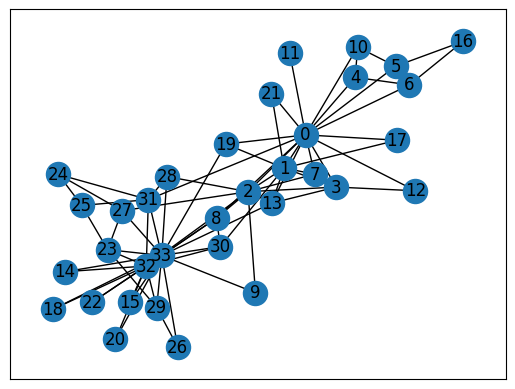

In [190]:
# verify the most similar nodes generated by node2vec from the graph
nx.draw_networkx(G)

In [191]:
# Retrieve node embeddings
node_ids = model.wv.index_to_key  # list of node IDs
node_embeddings = model.wv.vectors

In [192]:
print(node_ids)
print(node_embeddings)

['33', '0', '32', '2', '1', '31', '23', '3', '8', '13', '5', '25', '6', '7', '27', '29', '30', '4', '10', '24', '15', '16', '28', '26', '19', '22', '14', '12', '21', '20', '17', '11', '18', '9']
[[ 0.00991589 -0.09318399  0.0525699  ... -0.11116672 -0.08228555
   0.03912916]
 [-0.17044924  0.2398045   0.01941821 ... -0.19447212  0.01143514
  -0.00643768]
 [ 0.01812181 -0.0877829  -0.067954   ... -0.053328    0.03105451
   0.05927951]
 ...
 [-0.02429061  0.12247125  0.12130017 ... -0.17555763 -0.01386337
   0.00432357]
 [ 0.02585842 -0.06636841  0.01183501 ... -0.13420245 -0.00501015
   0.00215443]
 [-0.00039006 -0.05681166 -0.02517697 ... -0.18442765 -0.0188032
  -0.03076896]]


In [193]:
node_embeddings.shape

(34, 128)

# Node embeddings

*   In this lab, we will explore node embeddings. Node embeddings are low-dimensional vectors that represent the nodes in a graph. They can be used for a variety of tasks, such as clustering, classification, and link prediction.

*   We will start by exploring random walks. Random walks are a way of traversing a graph by selecting a node at random and then following one of its neighbors. We will use random walks to generate node sequences, which can then be used to train embedding models.

*   We will then move on to explore deep walk and node2vec. Deep walk and node2vec are two algorithms that can be used to learn node embeddings from random walk sequences. Deep walk uses a recursive neural network to learn the embeddings, while node2vec uses a skip-gram model.

*   Finally, we will explore embedding an entire graph. Embedding an entire graph means learning a vector representation for each node in the graph, such that the vectors capture the structural relationships between the nodes. This can be done using a variety of methods, such as DeepWalk, node2vec, and LINE.

In [194]:
try:
    # Check if Karate Club is installed:
    import karateclub
except ImportError:
    # If Karate Club is not installed, install it.
    %pip install karateclub==1.2.1

# Node Embeddings

We are looking for a function $f$ such that transforms every node $u$ in the graph $G$ into a vector representation $z_{u}$ in the embedding space $\mathbb{R}^{d}$

\begin{equation}
    f(u) = z_{u}
\end{equation}


**Spoiler**: This function is to be learned from the graph $G$ and is parameter-dependent




In [195]:
import random
import time
from typing import Optional, Tuple, Union

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from IPython.display import clear_output, display

In [196]:
def seed_everything(seed: Optional[int] = None) -> None:
    random.seed(seed)
    np.random.seed(seed)

seed_everything(42)

# Random Walk



*   Starting from vertex $v_{i}$ we obtain its random walk $W_{v_{i}}$
*   Every node will have its set of random walks, a.k.a. stochastic processes with random variables
    \begin{equation}
        W_{v_{i}}^{1}, W_{v_{i}}^{2}, \ldots
    \end{equation}
*   We choose the next vertex $W_{v_{i}}^{k+1}$ from the neighbours of the vertex $W_{v_{i}}^{k}$

A simple random walk can be modeled as follows

\begin{equation}
    P(c_{i}=x \vert c_{i-1}=v)
    =
    \left\lbrace
    \begin{matrix}
    \frac{1}{z}\pi_{vx} & (v,x) \in E \\
    0 & \text{otherwise}
    \end{matrix}
    \right.
\end{equation}

where

*   $c_{i}$ is the $i$-th node in the walk
*   $z$ is a normalization constant
*   $\pi_{vx}$ is an unnormalized transition probability between the nodes $v$ and $x$


In [197]:
class RandomWalk:
    def __init__(
        self,
        G: nx.Graph,
        node_size: int = 1500,
        width: int = 2,
        font_size: int = 16,
        fig_size: Tuple[int, int] = (8, 6),
        seed: Optional[int] = 42,
    ) -> None:
        self.G = G
        self.node_size = node_size
        self.width = width
        self.font_size = font_size
        self.fig_size = fig_size
        self.seed = seed

    def _draw(self, ax: plt.Axes) -> None:
        node_colors = [
            "tab:blue"
            if node == self.current_node
            else "tab:orange"
            if node == self.starting_node
            else "tab:gray"
            if node in self.visited_nodes
            else "white"
            for node in self.G.nodes
        ]
        edge_colors = ["tab:gray" if sorted(edge) in self.visited_edges else "black" for edge in self.G.edges]
        pos = nx.spring_layout(self.G, seed=self.seed)

        nx.draw(
            self.G,
            pos=pos,
            ax=ax,
            node_color=node_colors,
            edgecolors="black",
            edge_color=edge_colors,
            node_size=self.node_size,
            width=self.width,
            font_size=self.font_size,
            with_labels=True,
        )

    def run(self, num_steps: int = 5, sleep_seconds: float = 0.5) -> None:
        self.starting_node = random.choice(list(self.G.nodes))
        self.current_node = self.starting_node
        self.visited_nodes = [self.current_node]
        self.visited_edges = []
        title = f"Random walk ({num_steps} steps): {self.current_node}"

        fig = plt.gcf()
        ax = fig.gca()
        self._draw(ax)
        plt.title(title, fontsize=self.font_size, loc="left")
        display(fig)
        clear_output(wait=True)

        for _ in range(num_steps):
            previous_node = self.current_node
            self.current_node = random.choice(list(self.G.neighbors(previous_node)))
            self.visited_edges.append(sorted((previous_node, self.current_node)))
            self.visited_nodes.append(self.current_node)
            title += f" -> {self.current_node}"

            time.sleep(sleep_seconds)
            self._draw(ax)
            plt.title(title, fontsize=self.font_size, loc="left")
            display(fig)
            clear_output(wait=True)

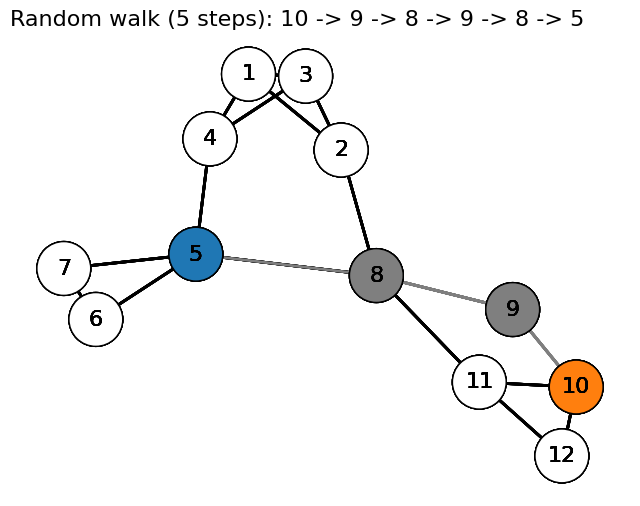

In [198]:
edge_list = [
    (1, 2),
    (1, 3),
    (1, 4),
    (2, 3),
    (2, 8),
    (3, 4),
    (4, 5),
    (5, 6),
    (5, 7),
    (5, 8),
    (6, 7),
    (8, 9),
    (8, 11),
    (9, 10),
    (10, 11),
    (10, 12),
    (11, 12),
]
G = nx.Graph(edge_list)
random_walk = RandomWalk(G)

plt.figure(figsize=(8, 6))
random_walk.run()
plt.show()

# How should we randomly walk?

In [199]:
from karateclub import Estimator
from sklearn.cluster import KMeans

In [200]:
def node_embedding_method_example(
    G: nx.Graph,
    model: Estimator,
    n_clusters: int = 4,
    node_size: int = 300,
    font_size=16, seed:
    Optional[int] = 42
) -> None:

    model.fit(G.copy())
    embeddings = model.get_embedding()
    labels = KMeans(n_clusters, random_state=seed).fit_predict(embeddings)

    pos = nx.spring_layout(G, seed=seed)
    cmap = plt.get_cmap("tab10")
    node_colors = [cmap(label) for label in labels]

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    ax.set_axis_off()
    ax = fig.add_subplot(1, 1, 1)
    nx.draw(G, pos=pos, node_color=node_colors, node_size=node_size, with_labels=True, ax=ax)
    plt.title(
        f"Colored nodes based on clusters identified by K-Means (K={n_clusters})\n on embeddings extracted with "
        f"{type(model).__name__}",
        fontsize=font_size,
    )
    plt.show()

## DeepWalk



In the DeepWalk approach our function $f$ is given by the linear transformation, whose $i$-th column has the vector representation for the $u_{i}$ node

\begin{equation}
    f(u_{i})
    =
    W_{\left\vert V\right\vert\times d}I_{i}
\end{equation}

for example

\begin{equation}
    \text{Embedding}
    =
    \begin{pmatrix}
        1 & 2 & 3 \\
        4 & 5 & 6 \\
        7 & 8 & 9 \\
    \end{pmatrix}
    \quad
    I_{2}
    =
    \begin{pmatrix}
        0 \\
        1 \\
        0 \\
    \end{pmatrix}
    \quad
    \text{Embedding}I_{2}
    =
    \begin{pmatrix}
        2 \\
        5 \\
        8 \\
    \end{pmatrix}
\end{equation}

so we get the embedding of the second node


How does the model work?

*   The probability of visiting the vertex $v_{i}$ given the all the previous vertices visited so far $v_{1}$, $v_{2}$, $\ldots$, $v_{i-1}$ in the random walk

    \begin{equation}
        P\left(v_{i} \vert v_{1}, v_{2}, \ldots, v_{i-1} \right)
        \quad
        \mapsto
        \quad
        P(v_{i} \vert f(v_{1}), f(v_{2}), \ldots, f(v_{i-1}) )
        \quad
        \approx
        \quad \texttt{Word2Vec(CBOW)}
    \end{equation}

*   The **problem** is that the random walks can grow and the probability can be expensive to compute, so we can do it conversely

    \begin{equation}
        P\left(v_{1}, v_{2}, \ldots, v_{i-1} \vert v_{i} \right)
        \quad
        \mapsto
        \quad
        P(v_{1}, v_{2}, \ldots, v_{i-1} \vert f(v_{i}) )
        \quad
        \approx
        \quad \texttt{Word2Vec(Skip-Gram)}
        \quad
        \checkmark
    \end{equation}

* Recall that $\texttt{Word2Vec}$ consists of two internal architectures (image taken from [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fsoftmax-activation-function-explained-a7e1bc3ad60&psig=AOvVaw00ynwi60C0CbWKt5hiNxom&ust=1695130330971000&source=images&cd=vfe&opi=89978449&ved=0CBMQ3YkBahcKEwjo2tTforSBAxUAAAAAHQAAAAAQAw))

    ![Word2Vec](https://www.researchgate.net/profile/Wang-Ling-16/publication/281812760/figure/fig1/AS:613966665486361@1523392468791/Illustration-of-the-Skip-gram-and-Continuous-Bag-of-Word-CBOW-models.png)

*   Just in case, the probability function is given by (assuming independent probabilities)

    \begin{equation}
        P(\left\lbrace v_{i-w}, \ldots, v_{i+w} \right\rbrace \vert f(v_{i}) )
        =
        \prod_{j=i-w, i \neq j }^{i+w} P(v_{j} \vert f(v_{i}))
    \end{equation}

*   Recall also that the softmax function returns the probabilities (image taken from [here](https://seed9d.github.io/hierarchical-softmax-in-word2vec/))

    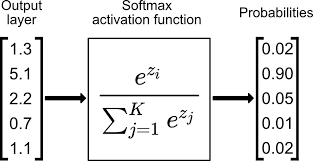

*   Now we need the loss function to train the algorithm

    \begin{equation}
        \min_{f} \left\lbrace
            P(\left\lbrace v_{i-w}, \ldots, v_{i+w} \right\rbrace \vert f(v_{i}) )
        \right\rbrace
    \end{equation}


In [201]:
from karateclub import DeepWalk

In [204]:
G = nx.karate_club_graph()

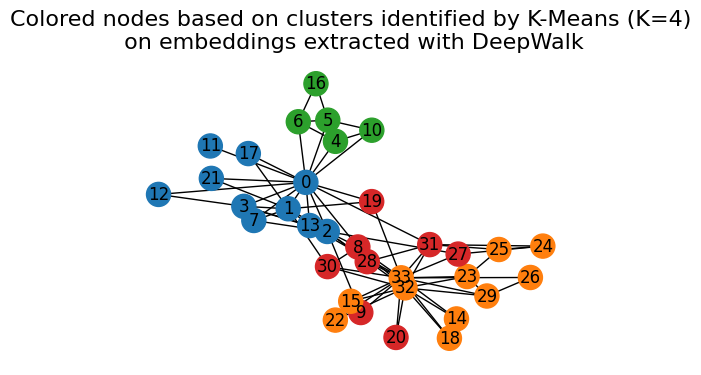

In [205]:
node_embedding_method_example(G, DeepWalk(dimensions=16))

## Node2Vec



> As with the DeepWalk approach, $\texttt{Node2Vec}$ also consists in a linear function $f$, whose $i$-th column has the vector representation for the $u_{i}$ node

\begin{equation}
    f(u_{i})
    =
    W_{\left\vert V\right\vert\times d}I_{i}
\end{equation}

How does the model work?

*   We keep the skip-gram approach with the random walks, but this time however we slightly modify the node sampling strategy so that it is neighbourhood-dependent

    ![SamplingStrategy](https://www.researchgate.net/profile/Melania-Berbatova/publication/353411035/figure/fig4/AS:1048721370402833@1627046067712/Difference-between-BFS-and-DFS-sampling-strategies-12.ppm)

    * **Breath-First Sampling** (BFS): Good for structural equivalence, bad for exploration
    * **Deep First Sampling** (DFS): Good for communities (homophily), bad due to excesive exploratory distance
    


*   Since the sample strategy changes, our transition probability changes

    \begin{equation}
        \pi_{vx}
        =
        \alpha_{pq}(t,x)
        \cdot
        w_{vx}
        \quad
        \text{where}
        \quad
        \alpha_{pq}(t,x)
        =
        \left\lbrace
        \begin{matrix}
        \frac{1}{p} & d(t,x) = 0 \\
        1 & d(t,x) = 1 \\
        \frac{1}{q} & d(t,x) = 2 \\
        \end{matrix}
        \right.
        \quad
        \text{and}
        \quad
        w_{vx} = w_{vx}(=1)
    \end{equation}

    ![TransitionProbability](https://www.researchgate.net/profile/Melania-Berbatova/publication/353411035/figure/fig5/AS:1048721370398723@1627046067822/Illustration-of-the-random-walk-procedure-in-node2vec12.ppm)

    *   $p$ acts as the control for going backard, a.k.a the return parameter
    *   $q$ acts as the control for going forward, a.k.a. the continue parameter or in-out parameter
    
        \begin{equation}
            q>1: \text{local} \quad q<1: \text{global}
        \end{equation}

    *   What about global and local? Sure, modifying the paremters allows to approximately interpolate BFS and DFS


*   The probability function is similar as in the previous case

    \begin{equation}
        P( N_{S}(u) \vert f(u) )
        =
        \prod_{n_{i} \in N_{S}(u)} P(n_{i} \vert f(u))
    \end{equation}

*   The optimization problem is similar as in the DeepWalk model

    \begin{equation}
        \max_{f} \left\lbrace
            P( N_{S}(u) \vert f(u) )
        \right\rbrace
    \end{equation}

**Edge Features**

In case we want to parametrize features associated to any particular edge $(u,v)$ in the graph $G$ there are varios methods to do it:

*   Average distance

\begin{equation}
    \left[f(u) \oplus f(v) \right]_{i}
    =
    \frac{1}{2}\left( f_{i}(u) + f_{i}(v) \right)
\end{equation}

*   Hadamard distance

\begin{equation}
    \left[f(u) \odot f(v) \right]_{i}
    =
    f_{i}(u) * f_{i}(v)
\end{equation}

*   Weighted $L_{1}$ distance

\begin{equation}
    \left\vert \left\vert f(u) \oplus f(v) \right\vert \right\vert_{\bar{1}i}
    =
    \left\vert f_{i}(u) - f_{i}(v) \right\vert
\end{equation}

*   Weighted $L_{2}$ distance

\begin{equation}
    \left\vert \left\vert f(u) \oplus f(v) \right\vert \right\vert_{\bar{2}i}
    =
    \left\vert f_{i}(u) - f_{i}(v) \right\vert^{2}
\end{equation}

# Embedding Entire Graphs

In [236]:
from karateclub import Node2Vec

G = nx.karate_club_graph()

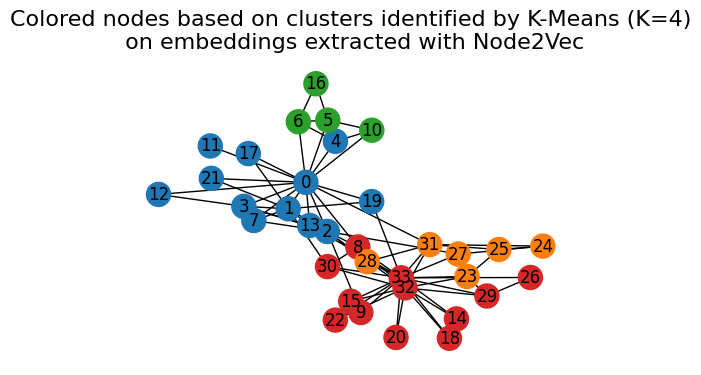

In [230]:
node_embedding_method_example(G, Node2Vec(dimensions=16))

Okay, so now I have the graph embedding, what can I do with it?

> The following part is an adaptation of a [tutorial](https://karateclub.readthedocs.io/en/latest/notes/introduction.html#graph-embedding) from the [Karate Club](https://karateclub.readthedocs.io/en/latest/index.html#) library

In [208]:
from karateclub.dataset import GraphSetReader
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

In [240]:
def split_and_fit_logistic_and_print_aoc(
    X: np.ndarray,
    y: np.ndarray,
    test_size: Union[int, float] = 0.2,
    seed: Optional[int] = 42
) -> None:

    print("Splitting the data:")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

    print(
        f"- X_train shape: {X_train.shape}\n- X_test shape: {X_test.shape}"
        f"\n- y_train shape: {y_train.shape}\n- y_test shape: {y_test.shape}"
    )

    print("\nFitting a logistic regression")
    downstream_model = LogisticRegression(random_state=seed).fit(X_train, y_train)
    y_hat = downstream_model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_hat)
    print(f"\nArea Under the ROC curve (AUC): {auc:.4f}")

In [237]:
reader = GraphSetReader("reddit10k")
graphs = reader.get_graphs()
y = reader.get_target()
number_of_graphs = len(graphs)
print("There are {} graphs in this dataset".format(number_of_graphs))

There are 10000 graphs in this dataset


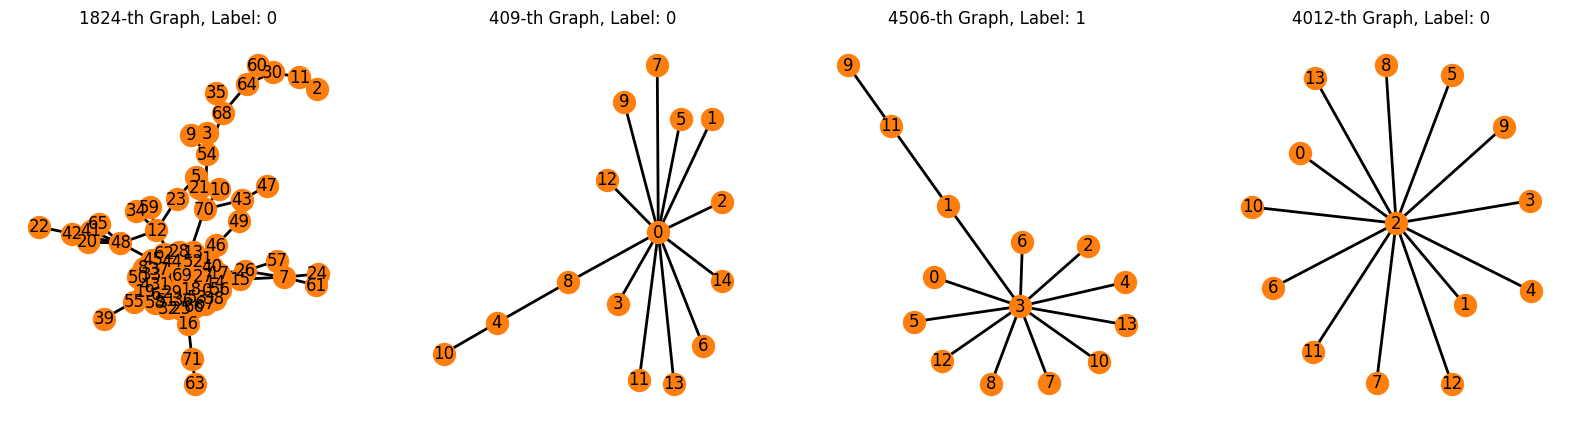

In [211]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
random_graph = random.sample(range(number_of_graphs), 4)
ax[0].set_axis_off()
ax[0] = fig.add_subplot(1, 4, 1)
ax[0].set_title("{}-th Graph, Label: {}".format(str(random_graph[0]), y[random_graph[0]]))
nx.draw(graphs[random_graph[0]], node_color="tab:orange", node_size=250, width=2, with_labels=True, ax=ax[0])
ax[1].set_axis_off()
ax[1] = fig.add_subplot(1, 4, 2)
ax[1].set_title("{}-th Graph, Label: {}".format(str(random_graph[1]), y[random_graph[1]]))
nx.draw(graphs[random_graph[1]], node_color="tab:orange", node_size=250, width=2, with_labels=True, ax=ax[1])
ax[2].set_axis_off()
ax[2] = fig.add_subplot(1, 4, 3)
ax[2].set_title("{}-th Graph, Label: {}".format(str(random_graph[2]), y[random_graph[2]]))
nx.draw(graphs[random_graph[2]], node_color="tab:orange", node_size=250, width=2, with_labels=True, ax=ax[2])
ax[3].set_axis_off()
ax[3] = fig.add_subplot(1, 4, 4)
ax[3].set_title("{}-th Graph, Label: {}".format(str(random_graph[3]), y[random_graph[3]]))
nx.draw(graphs[random_graph[3]], node_color="tab:orange", node_size=250, width=2, with_labels=True, ax=ax[3])
plt.show()

In [212]:
# The task is the classification of threads from the online forum Reddit. The threads can be of of two types -
# discussion and non-discussion based ones. Our goal is to predict the type of the thread based on the topological
# (structural) properties of the graphs. The specific dataset that we look a 10 thousand graph subsample of the Reddit
# 204K dataset which contains a large number of threads from the spring of 2018. The graphs in the dataset do not have
# a specific feature.

reader = GraphSetReader("reddit10k")
limit = 1000
graphs = reader.get_graphs()[:limit]
y = reader.get_target()[:limit]

# Approach 1

\begin{equation}
    G_{j} = \sum_{i=1}^{N} x_{ij}
\end{equation}

In [213]:
def get_graph_embedding(G: nx.Graph, model: Estimator) -> np.ndarray:
    model.fit(G.copy())
    return model.get_embedding().sum(axis=0)

In [214]:
# ! pip install jupyter-contrib-nbextensions
# ! jupyter nbextension enable --py widgetsnbextension --sys-prefix

In [215]:
print('Computing the graph embedding for each graph in the dataset using the "sum" approach')
X = np.vstack([get_graph_embedding(G, DeepWalk(dimensions=16)) for G in graphs])

Computing the graph embedding for each graph in the dataset using the "sum" approach


In [216]:
print("Dimension of the embedding matrix: {}".format(X.shape))

Dimension of the embedding matrix: (1000, 16)


In [217]:
split_and_fit_logistic_and_print_aoc(X, y)

Splitting the data:
- X_train shape: (800, 16)
- X_test shape: (200, 16)
- y_train shape: (800,)
- y_test shape: (200,)

Fitting a logistic regression

Area Under the ROC curve (AUC): 0.6698


# Approach 2

Add a virtual node $u_{\text{virtual}}$ to the original graph

\begin{equation}
   V \mapsto V \cup \lbrace u_{\text{virtual}} \rbrace
   \quad
   \text{and}
   \quad
   E \mapsto E \cup \lbrace (v, u_{\text{virtual}}) : v \in G \rbrace
\end{equation}

and retrieve the contributions of the graph to that virtual node

In [218]:
def get_graph_embedding(G: nx.Graph, model: Estimator) -> np.ndarray:
    G = G.copy()
    nodes = list(G.nodes())
    virtual_node = max(nodes) + 1
    G.add_node(virtual_node)
    G.add_edges_from([(virtual_node, node) for node in nodes])
    model.fit(G)
    return model.get_embedding()[-1]

In [219]:
print('Computing the graph embedding for each graph in the dataset using the "virtual node" approach')
X = np.vstack([get_graph_embedding(G, DeepWalk(dimensions=16)) for G in graphs])

Computing the graph embedding for each graph in the dataset using the "virtual node" approach


In [220]:
split_and_fit_logistic_and_print_aoc(X, y)

Splitting the data:
- X_train shape: (800, 16)
- X_test shape: (200, 16)
- y_train shape: (800,)
- y_test shape: (200,)

Fitting a logistic regression

Area Under the ROC curve (AUC): 0.7086


# Approach 3

Kernel based-methods like [AnonymousWalkKernel](https://arxiv.org/pdf/1805.11921.pdf)

In [221]:
# !git clone https://github.com/nd7141/AWE.git

# %cd AWE

# !git checkout fc4d3c4d180e5793d6cd4ba9235889067039d038

# from AnonymousWalkKernel import AnonymousWalks

# %cd ..
# %rm -rf AWE

Cloning into 'AWE'...
remote: Enumerating objects: 515, done.
remote: Total 515 (delta 0), reused 0 (delta 0), pack-reused 515 (from 1)
Receiving objects: 100% (515/515), 2.38 MiB | 4.63 MiB/s, done.
Resolving deltas: 100% (338/338), done.
/Users/kamil-sabbagh/Desktop/TA/Data-Knowledge-Representation/lab03/AWE
Note: switching to 'fc4d3c4d180e5793d6cd4ba9235889067039d038'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at fc4d3c4 Fix setup for FB parameters
/Users/kamil-sabbagh/Desktop/TA/Data-Knowledge-Representa

In [241]:
import random
import networkx as nx
import numpy as np
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

def get_random_walk(node, G, walk_length):
    random_walk = [node]
    for _ in range(walk_length - 1):
        neighbors = list(G.neighbors(node))
        if not neighbors:
            break
        node = random.choice(neighbors)
        random_walk.append(node)
    return random_walk

def anonymous_walk(walk):
    node_to_label = {}
    label = 0
    anon_walk = []
    for node in walk:
        if node not in node_to_label:
            node_to_label[node] = label
            label += 1
        anon_walk.append(node_to_label[node])
    return tuple(anon_walk)

def get_anonymous_walk_counts(G, walk_length=5, num_walks=10):
    anon_walk_counts = Counter()
    nodes = list(G.nodes())
    for node in nodes:
        for _ in range(num_walks):
            walk = get_random_walk(node, G, walk_length)
            anon_walk = anonymous_walk(walk)
            anon_walk_counts[anon_walk] += 1
    return anon_walk_counts

def compute_anonymous_walk_embeddings(graphs, walk_length=5, num_walks=10):
    anon_walk_counts_list = []
    for G in graphs:
        anon_walk_counts = get_anonymous_walk_counts(G, walk_length, num_walks)
        anon_walk_counts_list.append(anon_walk_counts)
    vec = DictVectorizer(sparse=False)
    X = vec.fit_transform(anon_walk_counts_list)
    return X

# Example usage:
print('Computing the graph embedding for each graph in the dataset using the anonymous walk approach')

X = compute_anonymous_walk_embeddings(graphs, walk_length=5, num_walks=10)

Computing the graph embedding for each graph in the dataset using the anonymous walk approach


In [242]:
split_and_fit_logistic_and_print_aoc(X, y)

Splitting the data:
- X_train shape: (8000, 49)
- X_test shape: (2000, 49)
- y_train shape: (8000,)
- y_test shape: (2000,)

Fitting a logistic regression

Area Under the ROC curve (AUC): 0.8130


## Compare with the method from the library

In [243]:
def get_graph_embedding(G: nx.Graph, num_steps: int = 3) -> np.ndarray:
    embedding = AnonymousWalks(G=G).embed(steps=num_steps, verbose=False)[0]
    return np.asarray(embedding)

print('Computing the graph embedding for each graph in the dataset using the "Anonymous Walk" approach')
X = np.vstack([get_graph_embedding(G)for G in graphs])

Computing the graph embedding for each graph in the dataset using the "Anonymous Walk" approach


In [245]:
split_and_fit_logistic_and_print_aoc(X, y)

Splitting the data:
- X_train shape: (8000, 7)
- X_test shape: (2000, 7)
- y_train shape: (8000,)
- y_test shape: (2000,)

Fitting a logistic regression

Area Under the ROC curve (AUC): 0.7849
